In [59]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('/Users/pedro/Downloads/BookDataSets (1)/Chapter  6 Data Sets/CH06PR05.txt', delim_whitespace=True, header=None)


/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_64636/50375326.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/Users/pedro/Downloads/BookDataSets (1)/Chapter  6 Data Sets/CH06PR05.txt', delim_whitespace=True, header=None)


In [33]:
data.rename({0: "Y (Brand Liking)", 1: "X₁ (Moisture Content)", 2: "X₂ (Sweetness)"}, axis='columns', inplace=True)

In [34]:
data.head()

,Y (Brand Liking),X₁ (Moisture Content),X₂ (Sweetness)
0,64.0,4.0,2.0
1,73.0,4.0,4.0
2,61.0,4.0,2.0
3,76.0,4.0,4.0
4,72.0,6.0,2.0


In [38]:
data.iloc[:,1].unique()

array([ 4.,  6.,  8., 10.])

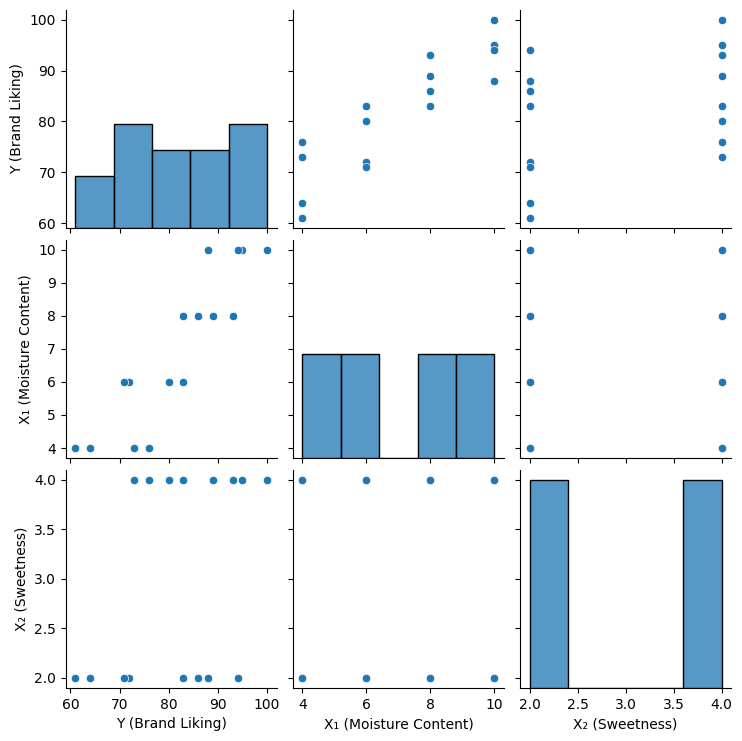

In [35]:
sns.pairplot(data)

<Axes: >

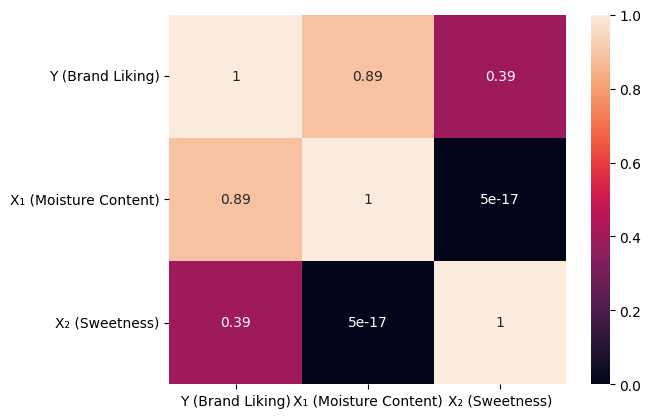

In [36]:
sns.heatmap(data.corr(), annot=True)

In [50]:
data_2 = data.copy()
data.rename({"Y (Brand Liking)":"Y","X₁ (Moisture Content)":"X1", "X₂ (Sweetness)": "X2"}, axis='columns', inplace=True)

In [54]:
statsmodels_model = smf.ols(formula='Y ~ X1 + X2', data=data).fit()


In [55]:
statsmodels_model.summary()

/Users/pedro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.66e-09
Time:                        17:45:28   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6500      2.996     12.566      0.000      31.177      44.123
X1             4.4250      0.301     14.695      0.000       3.774       5.076
X2             4.3750      0.673      6.498      0.000       2.920       5.830
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.647
Skew:                           0.049   Prob(JB):                        0.724
Kurtosis:                       2.020   Cond. No.                         35.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.02, 3.6300000000000017, 'Q3: 1.59')

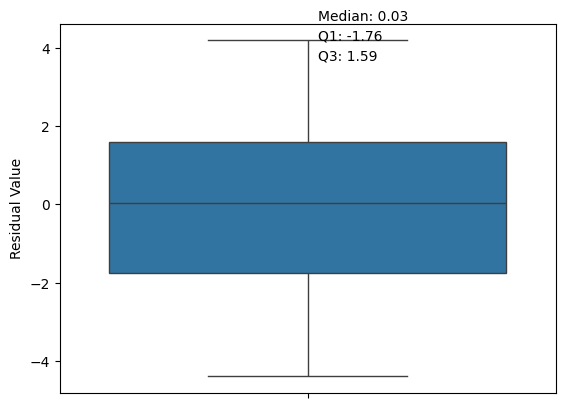

In [61]:

# Create boxplot
sns.boxplot(statsmodels_model.resid)
plt.ylabel('Residual Value')

# Calculate statistics
median = statsmodels_model.resid.median()
q1 = statsmodels_model.resid.quantile(0.25)
q3 = statsmodels_model.resid.quantile(0.75)

# Add text annotations
plt.text(0.02, plt.ylim()[1], f'Median: {median:.2f}', ha='left', va='bottom')
plt.text(0.02, plt.ylim()[1]-0.5, f'Q1: {q1:.2f}', ha='left', va='bottom')
plt.text(0.02, plt.ylim()[1]-1, f'Q3: {q3:.2f}', ha='left', va='bottom')

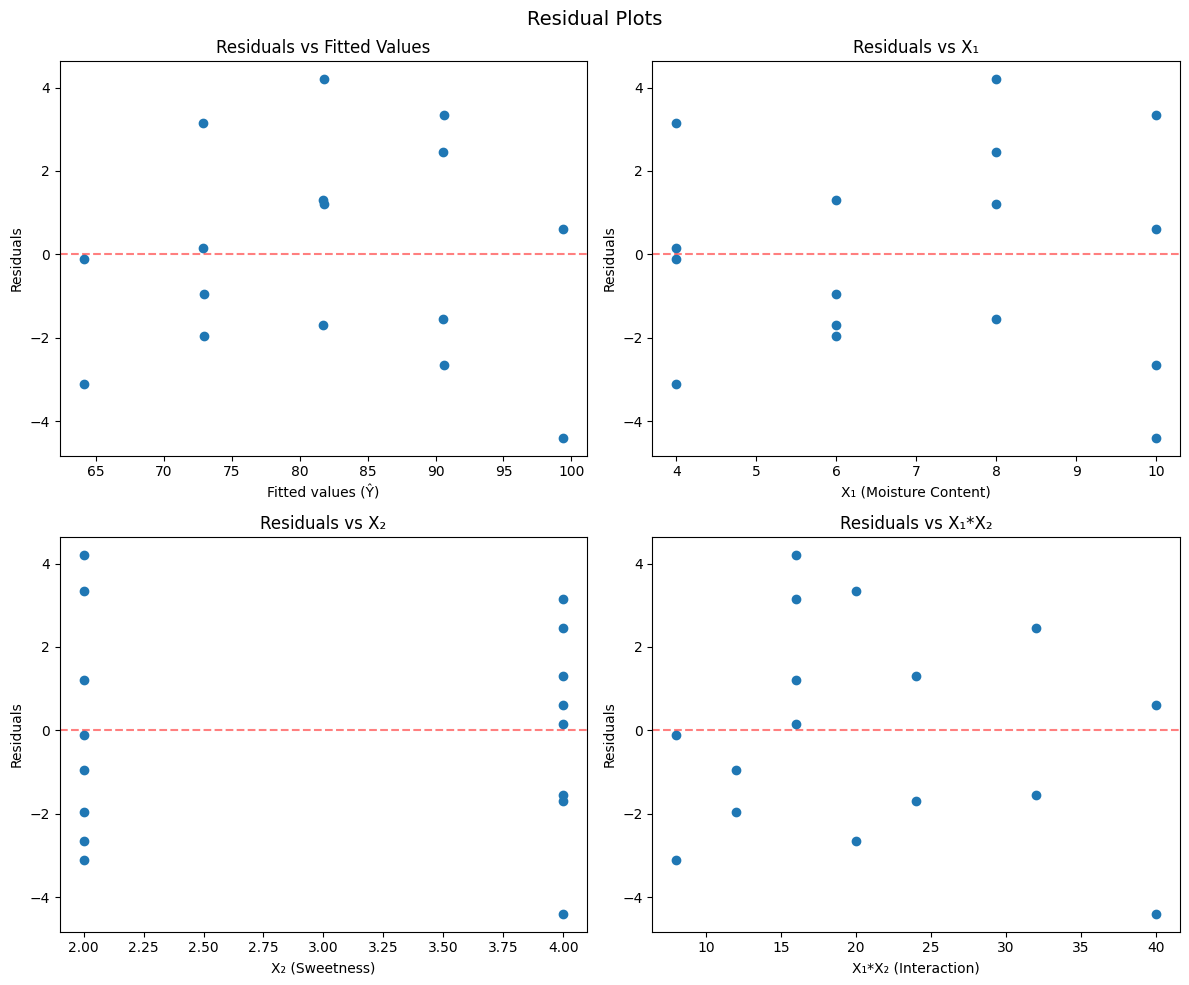

In [62]:
y_hat = statsmodels_model.fittedvalues

# Get the residuals
residuals = statsmodels_model.resid

# Create X1*X2 interaction term
X1X2 = data['X1'] * data['X2']

# Create a figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Residual Plots', fontsize=14)

# Plot 1: Residuals vs Y_hat
ax1.scatter(y_hat, residuals)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.set_xlabel('Fitted values (Ŷ)')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# Plot 2: Residuals vs X1
ax2.scatter(data['X1'], residuals)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.set_xlabel('X₁ (Moisture Content)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs X₁')

# Plot 3: Residuals vs X2
ax3.scatter(data['X2'], residuals)
ax3.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax3.set_xlabel('X₂ (Sweetness)')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals vs X₂')

# Plot 4: Residuals vs X1*X2
ax4.scatter(X1X2, residuals)
ax4.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax4.set_xlabel('X₁*X₂ (Interaction)')
ax4.set_ylabel('Residuals')
ax4.set_title('Residuals vs X₁*X₂')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 800x600 with 0 Axes>

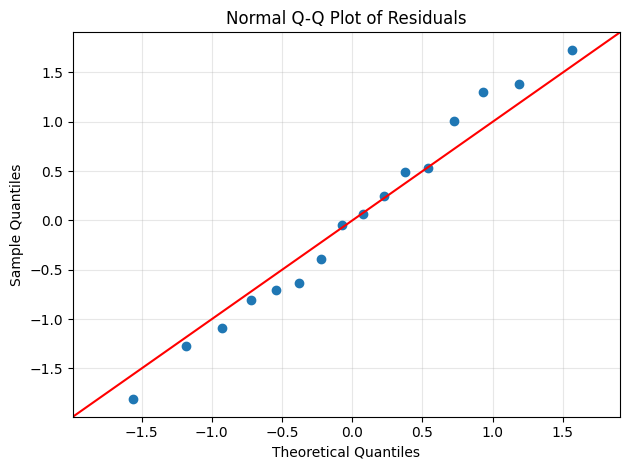

In [64]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 6))

# Create Q-Q plot
qq_plot = qqplot(statsmodels_model.resid, line='45', fit=True)

# Customize the plot
plt.title('Normal Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

In [68]:
import numpy as np

# Get squared residuals and take log
resid_squared = statsmodels_model.resid**2
log_resid_squared = np.log(resid_squared)

# Create auxiliary regression
# Regress log of squared residuals on X1 and X2
aux_model = smf.ols(formula='log_resid ~ X1 + X2', data={
    'log_resid': log_resid_squared,
    'X1': data['X1'],
    'X2': data['X2']
}).fit()

# Calculate test statistic
n = len(data)
R_squared = aux_model.rsquared
LM_stat = n * R_squared

# Find critical value (chi-square with 2 df at α = 0.01)
from scipy.stats import chi2
crit_value = chi2.ppf(0.99, df=2)

print(f'LM statistic: {LM_stat:.4f}')
print(f'Critical value: {crit_value:.4f}')
print(f'p-value: {1 - chi2.cdf(LM_stat, df=2):.4f}')

LM statistic: 3.1176
Critical value: 9.2103
p-value: 0.2104


In [69]:
from scipy import stats
X_combinations = data.groupby(['X1', 'X2']).size().reset_index()
n_groups = len(X_combinations)

# Calculate SSE (Sum of Squares Error) from original model
SSE = np.sum(statsmodels_model.resid**2)

# Calculate SSPE (Sum of Squares Pure Error)
SSPE = 0
dfPE = 0

for _, group in data.groupby(['X1', 'X2']):
    if len(group) > 1:  # if there are replicates
        group_mean = group['Y'].mean()
        SSPE += np.sum((group['Y'] - group_mean)**2)
        dfPE += len(group) - 1

# Calculate SSLF (Sum of Squares Lack of Fit)
SSLF = SSE - SSPE
dfLF = n_groups - 3  # number of X combinations minus number of parameters

# Calculate F statistic
F_stat = (SSLF/dfLF)/(SSPE/dfPE)

# Get critical value
F_crit = stats.f.ppf(0.99, dfLF, dfPE)

# Calculate p-value
p_value = 1 - stats.f.cdf(F_stat, dfLF, dfPE)

print(f'F statistic: {F_stat:.4f}')
print(f'Critical value: {F_crit:.4f}')
print(f'p-value: {p_value:.4f}')


F statistic: 1.0470
Critical value: 6.6318
p-value: 0.4530


In [70]:
from scipy import stats

# Get t-value
dof = 13  # degrees of freedom
alpha = 0.01  # for 99% confidence
g = 2  # number of parameters
t_value = stats.t.ppf(1 - alpha/(4*g), dof)

# Calculate intervals
b1_interval = [4.4250 - t_value*0.301, 4.4250 + t_value*0.301]
b2_interval = [4.3750 - t_value*0.673, 4.3750 + t_value*0.673]

print(f"β₁ interval: ({b1_interval[0]:.4f}, {b1_interval[1]:.4f})")
print(f"β₂ interval: ({b2_interval[0]:.4f}, {b2_interval[1]:.4f})")

β₁ interval: (3.3009, 5.5491)
β₂ interval: (1.8617, 6.8883)


In [71]:
y_pred = statsmodels_model.fittedvalues
y_actual = data['Y']

# Calculate correlation coefficient
correlation = np.corrcoef(y_actual, y_pred)[0,1]

# Square it to get R²
R2_simple = correlation**2

print(f"R² between Y and Ŷ: {R2_simple:.4f}")

R² between Y and Ŷ: 0.9521


In [72]:

# Create prediction data point
X_new = pd.DataFrame({'const': 1, 'X1': [5], 'X2': [4]})

# Get the mean response prediction
y_hat = statsmodels_model.predict(X_new)

# Get standard error of mean prediction
standard_error = np.sqrt(X_new @ statsmodels_model.cov_params() @ X_new.T)

# Get t-value for 99% confidence
from scipy import stats
t_value = stats.t.ppf(0.995, df=statsmodels_model.df_resid)  # 0.995 = 1 - α/2

# Calculate confidence interval
ci_lower = y_hat - t_value * standard_error[0][0]
ci_upper = y_hat + t_value * standard_error[0][0]

print(f"Predicted mean response: {y_hat[0]:.4f}")
print(f"99% Confidence Interval: ({ci_lower[0]:.4f}, {ci_upper[0]:.4f})")



ValueError: matrices are not aligned

In [86]:
new_df = pd.DataFrame({"X1":5, "X2":4},index=pd.RangeIndex(1

))  # add constant term and reshape

# Get prediction and confidence interval
prediction = statsmodels_model.get_prediction(new_df)
summary = prediction.summary_frame(alpha=0.01)  # 99% confidence level

print(f"Confidence Interval: [{float(summary['mean_ci_lower'].iloc[0])}, {float(summary['mean_ci_upper'].iloc[0])}]")
print(f"Prediction Interval: [{float(summary['obs_ci_lower'].iloc[0])}, {summary['obs_ci_upper'].iloc[0]}]")

Confidence Interval: [73.88110866595663, 80.66889133404332]
Prediction Interval: [68.4807695520395, 86.06923044796045]


In [83]:
data
new_df = pd.DataFrame({"X1":5, "X2":4},index=pd.RangeIndex(1

))

In [84]:
new_df

,X1,X2
0,5,4
